In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
df = pd.read_csv(r"D:\kaaagle_Data\heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [6]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df[['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']]:
    df[col] = le.fit_transform(df[col])

In [25]:
x = df.drop('HeartDisease',axis=1)
y = df['HeartDisease']

In [29]:
x

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,0,0.0,2
1,49,0,2,160,180,0,1,156,0,1.0,1
2,37,1,1,130,283,0,2,98,0,0.0,2
3,48,0,0,138,214,0,1,108,1,1.5,1
4,54,1,2,150,195,0,1,122,0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1
914,68,1,0,144,193,1,1,141,0,3.4,1
915,57,1,0,130,131,0,1,115,1,1.2,1
916,57,0,1,130,236,0,0,174,0,0.0,1


<Axes: ylabel='Cholesterol'>

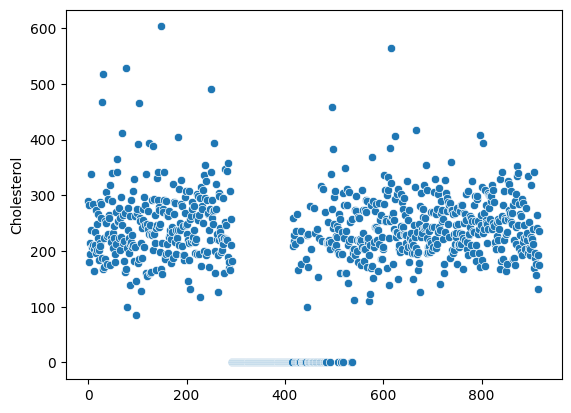

In [20]:
sns.scatterplot(x['Cholesterol'])

In [58]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x[['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']] = scaler.fit_transform(x[['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']])

In [59]:
x

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,0.244898,1,1,0.70,0.479270,0,1,0.788732,0,0.295455,2
1,0.428571,0,2,0.80,0.298507,0,1,0.676056,0,0.409091,1
2,0.183673,1,1,0.65,0.469320,0,2,0.267606,0,0.295455,2
3,0.408163,0,0,0.69,0.354892,0,1,0.338028,1,0.465909,1
4,0.530612,1,2,0.75,0.323383,0,1,0.436620,0,0.295455,2
...,...,...,...,...,...,...,...,...,...,...,...
913,0.346939,1,3,0.55,0.437811,0,1,0.507042,0,0.431818,1
914,0.816327,1,0,0.72,0.320066,1,1,0.570423,0,0.681818,1
915,0.591837,1,0,0.65,0.217247,0,1,0.387324,1,0.431818,1
916,0.591837,0,1,0.65,0.391376,0,0,0.802817,0,0.295455,1


In [60]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


In [61]:
cross_val_score(RandomForestClassifier(n_estimators=100),x_train,y_train).mean()

np.float64(0.871922467617184)

In [44]:
cross_val_score(LogisticRegression(),x_train,y_train,cv=5).mean()

C:\Users\dell\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dell\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modul

np.float64(0.8528468921815302)

In [45]:
cross_val_score(SVC(),x_train,y_train).mean()

np.float64(0.7261671792004473)

In [46]:
cross_val_score(KNeighborsClassifier(),x_train,y_train).mean()

np.float64(0.7043425589413848)

In [49]:
cross_val_score(DecisionTreeClassifier(),x_train,y_train).mean()

np.float64(0.7779703662286833)

In [66]:
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier(estimator=RandomForestClassifier(), n_estimators=100, oob_score=True)
model.fit(x_train, y_train)
model.oob_score_

0.8623978201634878

In [67]:
model.score(x_test,y_test)

0.8913043478260869

In [ ]:
y_test[]

668    0
30     1
377    1
535    1
807    0
      ..
211    1
745    1
584    1
878    0
451    1
Name: HeartDisease, Length: 184, dtype: int64

In [72]:
model.predict(x_test.loc[878].values.reshape(1, -1))

C:\Users\dell\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(


array([0])

In [78]:
import pickle
with open("Heart_Project.pkl","wb") as f:
    pickle.dump(model,f)


In [73]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
confusion_matrix(y_test,y_pred)

array([[68,  9],
       [11, 96]])

<Axes: >

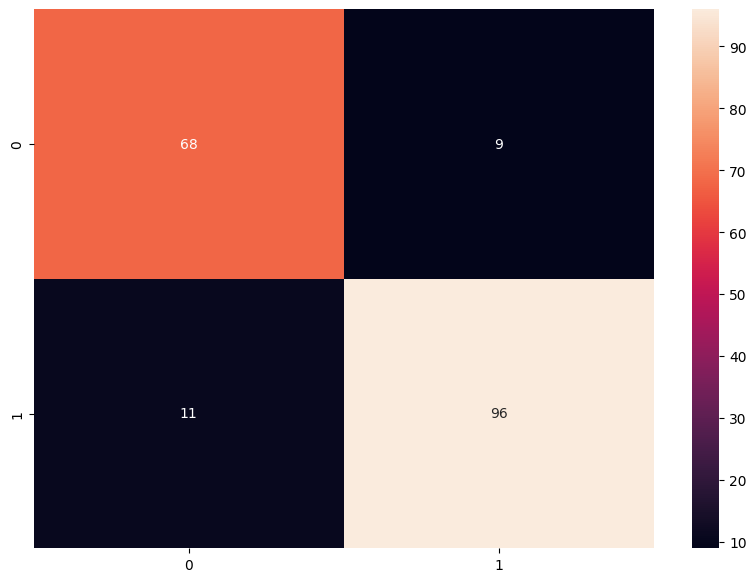

In [74]:
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='d')

In [80]:
x.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,0.244898,1,1,0.70,0.479270,0,1,0.788732,0,0.295455,2
1,0.428571,0,2,0.80,0.298507,0,1,0.676056,0,0.409091,1
2,0.183673,1,1,0.65,0.469320,0,2,0.267606,0,0.295455,2
3,0.408163,0,0,0.69,0.354892,0,1,0.338028,1,0.465909,1
4,0.530612,1,2,0.75,0.323383,0,1,0.436620,0,0.295455,2
